# UNIDAD 4 - PROYECTO: ANÁLISIS DE SENTIMIENTOS Y PREDICCIÓN.

# Héctor Alejandro Ramírez Cruz
# 19121063

## PRESENTACIÓN.

El siguiente proyecto consiste en emplear el análisis de sentimientos para tratar de predecir las calificaciones de una serie.

El dataset es sobre las calificaciones que recibió la adaptación al "live-action" el anime "OnePiece".

El dataset contiene las reseñas que se recibieron en la plataforma de Netflix, el dataset contiene información como:

* Título.
* Reseña.
* Fecha.
* Calificación.


## ETAPA 1: ANÁLISIS EXPLORATORIO DE LOS DATOS.

### Paso 1. Importe las librerías necesarias (pandas, numpy, seaborn, nltk, etc...)

### Paso 2. Cargue y muestre información del dataset; muestre información estadística de las columnas numéricas.

### Paso 3. Identifique los datos nulos: muestre las filas que contienen datos nulos (no se deben tratar aún).

### Paso 4. Muestre la distribución de la columna "Rating", haga un análisis de la distribución.

### Paso 5. Identifique si alguna de las columnas se puede convertir en categórica.


## Paso 1. Importe las librerías necesarias 

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [9]:
#download nltk corpus (first time only)
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data

[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\Huach\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\wordnet2022.zip.
[nltk_data]    | Downloading package wo

True

## Paso 2. Cargue y muestre información del dataset; muestre información estadística de las columnas numéricas.

In [14]:
ubicacionArchivo = "reviews.csv"
df = pd.read_csv(ubicacionArchivo)
display(df.head())

,Title,Review,Date,Rating
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   878 non-null    object 
 1   Review  878 non-null    object 
 2   Date    878 non-null    object 
 3   Rating  870 non-null    float64
dtypes: float64(1), object(3)
memory usage: 27.6+ KB
None


In [16]:
display(df.describe())

,Rating
count,870.000000
mean,8.517241
std,2.268826
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


## Paso 3. Identifique los datos nulos: muestre las filas que contienen datos nulos

In [17]:
print(df.isna().sum().sort_values(ascending=False))

Rating    8
Title     0
Review    0
Date      0
dtype: int64


In [18]:
display(df[df.isnull().any(1)])

C:\Users\Huach\AppData\Local\Temp\ipykernel_10792\721979434.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  display(df[df.isnull().any(1)])


,Title,Review,Date,Rating
143,"I didn't expect much, but I absolutely love it.","I admit, when I write reviews it's usually whe...",25 September 2023,NaN
145,"Thank you for heading this, Oda!","Fun fact: Eiichiro Oda, the creator of the man...",12 September 2023,NaN
447,DIFFERENT MEDIA MEANS DIFFERENT STORYTELLING A...,Just because there are many scenes in the mang...,1 September 2023,NaN
500,I'm not sure about rating yet!,I like the characters so far except Sanji's ha...,4 September 2023,NaN
520,Great adaptation!,One Piece somehow managed to pull it off: a le...,8 September 2023,NaN
540,My disappointment is immeasurable,As a life long fan of One Piece I don't know w...,31 August 2023,NaN
569,A must watch,If you browse there are series with more actio...,2 September 2023,NaN
782,Emily Rudd's hair as Nami,Everything went so right with casting and thei...,1 September 2023,NaN


## Paso 4. Muestre la distribución de la columna "Rating", haga un análisis de la distribución.

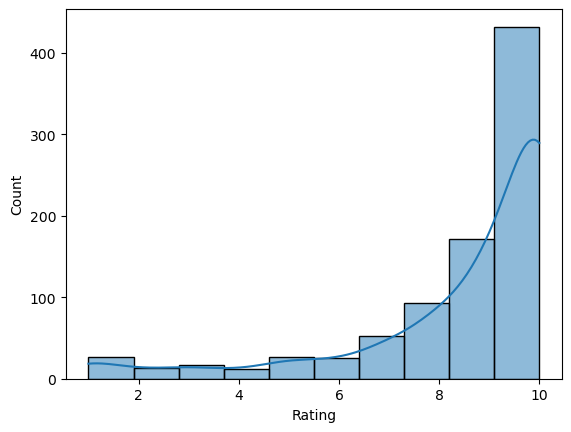

In [19]:
sns.histplot(data=df, x="Rating",bins= 10, kde = True)
plt.show()

#### La columna Rating muestra una distribucion de Minimo extremo, ya que tiene presencia de una asimetria evidente en el lado derecho de la grafica y valores minimos en la derecha.

## ETAPA 2: ANÁLISIS DE SENTIMIENTOS.

### Paso 1. Muestre las primeras 10 filas del dataset con las columnas "Rating" y "Review", haga un análisis rápido de esa información.

### Paso 2. Haga una función que se encargue del pre-procesamiento:
#### - Genere los tokens.
#### - Filtre las palabras de parada.
#### - Obtenga el lema de las palabras y guárdelo en una lista.
#### - Retorne la lista en forma de una cadena, para ello debe unir los elementos de la lista mediante un espacio.

### Paso 3. Aplique la función creada para obtener el lema de las columnas "Review" y "Title", guárde el resultado en nuevas columnas dentro del dataframe original (por ejemplo: "ReviewText", "TitleText").

### Paso 4. Haga una función para obtener el sentimiento de las palabras, para ello puede utilizar el SentimentIntensityAnalizer() y su función "polarity_scores()". Al final debe retornar el puntaje de sentimiento.

### Paso 5. Aplique la función creada para obtener el sentimiento en las columnas creadas en el paso 3, guarde el resultado en un par de columnas nuevas (por ejemplo: "ReviewSentiment", "TitleSentiment").

### Paso 6. Prepare un dataframe con las columnas originales + las columnas creadas previamente, tendrían que haber 8 columnas, 3 de ellas deben ser numéricas (incluyendo "Rating").



## Paso 1. Muestre las primeras 10 filas del dataset con las columnas "Rating" y "Review", haga un análisis rápido de esa información

In [20]:
columnas_seleccionadas = ['Rating', 'Review']
display(df[columnas_seleccionadas].head(10))

,Rating,Review
0,8.0,I have to admit that I've never watched any of...
1,9.0,I'm a 60yo man & old school like the The Marin...
2,9.0,Every live action anime that I've briefly seen...
3,10.0,This is bar none one of the best live-action a...
4,10.0,"Being a one piece fan myself, I was a bit inse..."
5,10.0,GREAT ADAPTATION! As an old-school fan (since ...
6,9.0,My kids play and watch One Piece anime and lov...
7,10.0,I was so surprised that Netflix made something...
8,8.0,Parenthetically I don't know anything about th...
9,10.0,Initially I was apprehensive because of anime ...


De acuerdo a las calificaciones podemos observar que la serie a sido recibida de manera positiva, los comentarios apoyan estas calificaciones, solo por esta puqueña muestra podemos decir que la serie es un exito, pero es muy prematuro hablar de concluciones.

## Paso 2. Haga una función que se encargue del pre-procesamiento:

In [21]:
def prepocess_text(text):
    
    #Tokenize the text
    tokens = word_tokenize(text.lower()) 
    
    #Remove Stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    #Lematize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    #Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

## Paso 3. Aplique la función creada para obtener el lema de las columnas "Review" y "Title", guárde el resultado en nuevas columnas dentro del dataframe original (por ejemplo: "ReviewText", "TitleText").

In [22]:
df['ReviewText'] = df['Review'].apply(prepocess_text)
display(df.head())

,Title,Review,Date,Rating,ReviewText
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0,admit 've never watched animated show one piec...
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0,'m 60yo man & old school like marine admiral 😄...
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0,every live action anime 've briefly seen nothi...
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0,bar none one best live-action adaption animate...
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0,"one piece fan , bit insecured starting series ..."


In [23]:
df['TitleText'] = df['Title'].apply(prepocess_text)
display(df.head())

,Title,Review,Date,Rating,ReviewText,TitleText
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0,admit 've never watched animated show one piec...,never seen anime still enjoyed
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0,'m 60yo man & old school like marine admiral 😄...,kind show . loved .
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0,every live action anime 've briefly seen nothi...,'m shocked good ...
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0,bar none one best live-action adaption animate...,see netflix ? ? ...
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0,"one piece fan , bit insecured starting series ...",want season 2


## Paso 4. Haga una función para obtener el sentimiento de las palabras, para ello puede utilizar el SentimentIntensityAnalizer() y su función "polarity_scores()". Al final debe retornar el puntaje de sentimiento.

In [24]:
#initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#create get_sentiment fuction
def get_sentiment(text):
    
    scores = analyzer.polarity_scores(text)
    
    sentiment = 1 if scores['pos'] > 0 else 0
    
    return sentiment

## Paso 5. Aplique la función creada para obtener el sentimiento en las columnas creadas en el paso 3, guarde el resultado en un par de columnas nuevas (por ejemplo: "ReviewSentiment", "TitleSentiment").

In [26]:
#aply get_sentiment fuction
df['Reviewsentiment'] = df['ReviewText'].apply(get_sentiment)
display(df.head())

,Title,Review,Date,Rating,ReviewText,TitleText,Reviewsentiment
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0,admit 've never watched animated show one piec...,never seen anime still enjoyed,1
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0,'m 60yo man & old school like marine admiral 😄...,kind show . loved .,1
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0,every live action anime 've briefly seen nothi...,'m shocked good ...,1
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0,bar none one best live-action adaption animate...,see netflix ? ? ...,1
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0,"one piece fan , bit insecured starting series ...",want season 2,1


In [27]:
df['Titlesentiment'] = df['TitleText'].apply(get_sentiment)
display(df.head())

,Title,Review,Date,Rating,ReviewText,TitleText,Reviewsentiment,Titlesentiment
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0,admit 've never watched animated show one piec...,never seen anime still enjoyed,1,1
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0,'m 60yo man & old school like marine admiral 😄...,kind show . loved .,1,1
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0,every live action anime 've briefly seen nothi...,'m shocked good ...,1,1
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0,bar none one best live-action adaption animate...,see netflix ? ? ...,1,0
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0,"one piece fan , bit insecured starting series ...",want season 2,1,1


## Paso 6. Prepare un dataframe con las columnas originales + las columnas creadas previamente, tendrían que haber 8 columnas, 3 de ellas deben ser numéricas (incluyendo "Rating").

In [28]:
display(df.head())

,Title,Review,Date,Rating,ReviewText,TitleText,Reviewsentiment,Titlesentiment
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0,admit 've never watched animated show one piec...,never seen anime still enjoyed,1,1
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0,'m 60yo man & old school like marine admiral 😄...,kind show . loved .,1,1
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0,every live action anime 've briefly seen nothi...,'m shocked good ...,1,1
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0,bar none one best live-action adaption animate...,see netflix ? ? ...,1,0
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0,"one piece fan , bit insecured starting series ...",want season 2,1,1


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            878 non-null    object 
 1   Review           878 non-null    object 
 2   Date             878 non-null    object 
 3   Rating           870 non-null    float64
 4   ReviewText       878 non-null    object 
 5   TitleText        878 non-null    object 
 6   Reviewsentiment  878 non-null    int64  
 7   Titlesentiment   878 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 55.0+ KB
None


## ETAPA 3: MACHINE LEARNING.

### Paso 1. Asigne a la variable X las columnas numéricas menos "Rating"; asigne a la variable y la columna "Rating", seleccione únicamente las filas sin datos nulos (no elimine ni trate las filas con datos nulos, esas se usarán para predecir)

### Paso 2. Divida en una muestra de entrenamiento y en una muestra de pruebas, estratifique en base a la proporción de la variable objetivo. El tamaño de la muestra para entrenamiento debe ser del 85%. Asigne una semilla para poder reproducir los resultados.

### Paso 3. Entrene los siguientes modelos:
#### - KNN para clasificación
#### - SVM para clasificación
#### - RandomForest para clasificación

### Paso 4. Evalúe el rendimiento de los modelos (puede usar accuracy) creados en el paso previo, muestre las predicciones realizadas y compare con las etiquetas reales.

### Paso 5. Debido a que este es un problema de clasificación, pero hay varias clases que son originalmente numéricas, se puede aplicar también una métrica de evaluación para regresión. Aplique el RMSE a las predicciones y las etiquetas reales, analice el resultado.

### Paso 6. Utilice el modelo que se comportó mejor para predecir el "Rating" de las filas que tienen ese dato nulo, revise manualmente si la calificación predicha es consistente con el comentario en la reseña.

### Paso 7. Escriba sus conclusiones al respecto.

## Paso 1. Asigne a la variable X las columnas numéricas menos "Rating"; asigne a la variable y la columna "Rating", seleccione únicamente las filas sin datos nulos (no elimine ni trate las filas con datos nulos, esas se usarán para predecir).

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [31]:
X = df.drop(['Rating'], axis=1).select_dtypes(include=['float64', 'int64']).loc[df['Rating'].notnull()]
y = df['Rating'].loc[df['Rating'].notnull()]
display(X)

,Reviewsentiment,Titlesentiment
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
873,1,1
874,1,1
875,1,1
876,1,1


## Paso 2. Divida en una muestra de entrenamiento y en una muestra de pruebas, estratifique en base a la proporción de la variable objetivo. El tamaño de la muestra para entrenamiento debe ser del 85%. Asigne una semilla para poder reproducir los resultados.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=1211)

## Paso 3. Entrene los siguientes modelos:

### KNN para clasificación

In [105]:
neigh = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', leaf_size = 44, n_jobs=-1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=44, n_jobs=-1, n_neighbors=15,
                     weights='distance')

### SVM para clasificación

In [149]:
modelo = SVC(kernel = 'rbf', gamma = 0.4, C = 0.2,random_state=123)
modelo.fit(X_train, y_train)

SVC(C=0.2, gamma=0.4, random_state=123)

### RandomForest para clasificación

In [153]:
rf = RandomForestClassifier(max_depth=5, min_samples_leaf = 6, random_state=789)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=6, random_state=789)

## Paso 4. Evalúe el rendimiento de los modelos (puede usar accuracy) creados en el paso previo, muestre las predicciones realizadas y compare con las etiquetas reales.

### KNN

In [133]:
y_pred = neigh.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo KNN: {accuracy_knn:.2f}')
df_resultadosknn = pd.DataFrame({'Original': y_test, 'KNN': y_pred})
print(df_resultadosKNN.head())

Accuracy del modelo KNN: 0.37
     Original   KNN
147       9.0  10.0
661      10.0  10.0
461       9.0  10.0
630      10.0  10.0
812      10.0  10.0


### SVM

In [150]:
y_predsvc = modelo.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_predsvc)
print(f'Accuracy del modelo SVC: {accuracy_svc:.2f}')
df_resultadossvc = pd.DataFrame({'Original': y_test, 'SVC': y_predsvc})
print(df_resultadosSVC.head())

Accuracy del modelo SVC: 0.50
     Original   SVC
147       9.0  10.0
661      10.0  10.0
461       9.0  10.0
630      10.0  10.0
812      10.0  10.0


### Random Forest

In [154]:
y_predrf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_predrf)
print(f'Accuracy del modelo rf: {accuracy_rf:.2f}')
df_resultadosrf = pd.DataFrame({'Original': y_test, 'RF': y_predrf})
print(df_resultadosrf.head())

Accuracy del modelo rf: 0.50
     Original    RF
147       9.0  10.0
661      10.0  10.0
461       9.0  10.0
630      10.0  10.0
812      10.0  10.0


## Paso 5. Debido a que este es un problema de clasificación, pero hay varias clases que son originalmente numéricas, se puede aplicar también una métrica de evaluación para regresión. Aplique el RMSE a las predicciones y las etiquetas reales, analice el resultado.

### KNN

In [162]:
rmse = mean_squared_error(y_test, y_pred)**(1/2)
print(f'RMSE del modelo KNN: {rmse:.2f}')
df_resultadosrf = pd.DataFrame({'Original': y_test, 'RF': y_predrf})
print(df_resultadosrf.head())

RMSE del modelo KNN: 2.85
     Original    RF
147       9.0  10.0
661      10.0  10.0
461       9.0  10.0
630      10.0  10.0
812      10.0  10.0


### SVM

In [163]:
rmse_svm = mean_squared_error(y_test, y_predsvc)**(1/2)
print(f'RMSE del modelo SVM: {rmse_svm:.2f}')
df_resultadosrf = pd.DataFrame({'Original': y_test, 'RF': y_predrf})
print(df_resultadosrf.head())

RMSE del modelo SVM: 2.68
     Original    RF
147       9.0  10.0
661      10.0  10.0
461       9.0  10.0
630      10.0  10.0
812      10.0  10.0


### Random Forest

In [164]:
rmse_rf = mean_squared_error(y_test, y_predrf)**(1/2)
print(f'RMSE del modelo Random Fores: {rmse_rf:.2f}')
df_resultadosrf = pd.DataFrame({'Original': y_test, 'RF': y_predrf})
print(df_resultadosrf.head())

RMSE del modelo Random Fores: 2.68
     Original    RF
147       9.0  10.0
661      10.0  10.0
461       9.0  10.0
630      10.0  10.0
812      10.0  10.0


## Paso 6. Utilice el modelo que se comportó mejor para predecir el "Rating" de las filas que tienen ese dato nulo, revise manualmente si la calificación predicha es consistente con el comentario en la reseña.

In [192]:
sin_calificar = df[df.isnull().any(1)]
X_null = X = sin_calificar.drop(['Rating'], axis=1).select_dtypes(include=['float64', 'int64'])
y_prednull = rf.predict(X_null)
sin_calificar['Rating'] = y_prednull
display(sin_calificar)

C:\Users\Huach\AppData\Local\Temp\ipykernel_10792\3250582293.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  sin_calificar = df[df.isnull().any(1)]
C:\Users\Huach\AppData\Local\Temp\ipykernel_10792\3250582293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_calificar['Rating'] = y_prednull


,Title,Review,Date,Rating,ReviewText,TitleText,Reviewsentiment,Titlesentiment
143,"I didn't expect much, but I absolutely love it.","I admit, when I write reviews it's usually whe...",25 September 2023,10.0,"admit , write review 's usually something drea...","n't expect much , absolutely love .",1,1
145,"Thank you for heading this, Oda!","Fun fact: Eiichiro Oda, the creator of the man...",12 September 2023,10.0,"fun fact : eiichiro oda , creator manga one pi...","thank heading , oda !",1,1
447,DIFFERENT MEDIA MEANS DIFFERENT STORYTELLING A...,Just because there are many scenes in the mang...,1 September 2023,10.0,"many scene manga n't accurate show , n't mean ...",different medium mean different storytelling a...,1,0
500,I'm not sure about rating yet!,I like the characters so far except Sanji's ha...,4 September 2023,10.0,like character far except sanji 's hair cut us...,'m sure rating yet !,1,1
520,Great adaptation!,One Piece somehow managed to pull it off: a le...,8 September 2023,10.0,one piece somehow managed pull : legit great l...,great adaptation !,1,1
540,My disappointment is immeasurable,As a life long fan of One Piece I don't know w...,31 August 2023,10.0,life long fan one piece n't know begin ? came ...,disappointment immeasurable,1,0
569,A must watch,If you browse there are series with more actio...,2 September 2023,10.0,"browse series action one piece , funnier one ,...",must watch,1,0
782,Emily Rudd's hair as Nami,Everything went so right with casting and thei...,1 September 2023,10.0,everything went right casting look . prob emil...,emily rudd 's hair nami,1,0


## Paso 7. Escriba sus conclusiones al respecto

Es dificil saber si el entrenamiento de los modelos fue adecuado ya que no encotre una configuracion correcta de los parametros para que pudiera cambiar la calificacion tanto de Accuracy como de RSME, puede que necesite una mayor cantidad de datos para que los modelos puedan funcionar porque es facil caer en el Overfit ya que al tener una mayor cantidad de datos ubicados en la ponderacion 10 es facil que el modelo solo aprenda que debe predecir con 10 las reseñas, tambien tendriamos que analizar que como influye en analisis de sentimientos ya que aunque el titulo sea ponderado como 1 de correcto la reseña contiene un 0, esa difrerencia entre los parametros de entrenamiento tambien puede ser un problema para lo aprendido por el modelo.

## ETAPA 4: PRESENTACIÓN DEL PROYECTO.
### Al igual que en los proyectos anteriores, suba su trabajo terminado a un repositorio nuevo de su GitHub.
### Escriba un archivo "README" y describa el proceso seguido en este trabajo.
### Al entregar este trabajo, debe subir este archivo, el archivo de instrucciones y el enlace al repositorio público de GitHub con este trabajo.